In [1]:
%matplotlib inline

In [2]:
import spotipy
from credentials import client_id, client_secret
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
from datetime import datetime

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

scope = 'user-library-read' #this came from the tutorial ¯\_(ツ)_/¯
user = '125065858' #had to get this from the spotify desktop app

include = [
    'Hip-Hop: 1994 - 1999',
    'Hip-Hop: 2000 - 2006',
    'Hip-Hop: 2007 - 2014'
]

In [21]:
# generate the arrays first

playlists = sp.user_playlists(user)
arr = []

while playlists:
    
    for i, playlist in enumerate(playlists['items']):
        if playlist['name'] in include:
            print(playlist['name'])
            playlist_length = 0
            
            playlist_id, playlist_name, playlist_uri = playlist['id'], playlist['name'], playlist['uri']

            tracks = sp.user_playlist_tracks(user=user,playlist_id=playlist_id)
            tracklist = tracks['items']
            for track in tracklist:
                track_info = track['track']
                track_id, track_name, track_popularity, track_uri, added_on = track_info['id'], track_info['name'], track_info['popularity'], track_info['uri'], track['added_at']
                artists = [i['name'] for i in track['track']['artists']]
                track_artist = artists[0]
                if len(artists) > 1:
                    featured_artists = ', '.join(artists[1:])
                else:
                    featured_artists = ''
                playlist_length += 1
                print('Song count:', playlist_length, end='\r')

                
                track_arr = [playlist_id, playlist_name, playlist_uri, track_id, track_name, track_artist, featured_artists, track_popularity, track_uri, added_on]
                #feature_arr = list(sp.audio_features(tracks=['2uPc8UjfmiuzmAJj3VBs8N'])[0].values()) #this takes too long!
                arr.append(track_arr)# + feature_arr)

            print()
            
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

df = pd.DataFrame(arr,columns=['playlist_id', 'playlist_name', 'playlist_uri', 'track_id', 'track_name', 'track_artist', 'featured_artists', 'track_popularity', 'track_uri', 'added_on'])

# either write data to file line by line within loops, or take all arrays, stuff them into a dataframe, and write to csv
counter = 0
for track_id in df['track_id']:
    counter += 1
    d = sp.audio_features(tracks=[track_id])[0]
    for i in d:
        print(len(df)-counter,'of',len(df),'remaining |',end='\r')
        df.loc[df['track_id'] == d['id'],i] = d[i]        

df['time_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').time() for dt in df['added_on']]
df['date_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').date() for dt in df['added_on']]
df['hour_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').hour for dt in df['added_on']]
df['day_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').isoweekday() for dt in df['added_on']]
df['month_added'] = [datetime.strptime(dt,'%Y-%m-%dT%H:%M:%SZ').month for dt in df['added_on']]        
        
df.to_csv('HH-spotify_playlist_info.csv',index=False)

Hip-Hop: 1994 - 1999
Song count: 44
Hip-Hop: 2000 - 2006
Song count: 100
Hip-Hop: 2007 - 2014
Song count: 97


---

In [8]:
df = pd.read_csv('HH-spotify_playlist_info.csv')

In [16]:
df.columns

Index(['playlist_id', 'playlist_name', 'playlist_uri', 'track_id',
       'track_name', 'track_artist', 'featured_artists', 'track_popularity',
       'track_uri', 'added_on', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [22]:
df.head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_artist,featured_artists,track_popularity,track_uri,added_on,...,uri,track_href,analysis_url,duration_ms,time_signature,time_added,date_added,hour_added,day_added,month_added
0,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,22uZ8sPzkovoQG4Cu39Pqe,Big Pimpin',JAY Z,UGK,0,spotify:track:22uZ8sPzkovoQG4Cu39Pqe,2016-12-31T05:45:38Z,...,spotify:track:22uZ8sPzkovoQG4Cu39Pqe,https://api.spotify.com/v1/tracks/22uZ8sPzkovo...,https://api.spotify.com/v1/audio-analysis/22uZ...,284640.0,4.0,05:45:38,2016-12-31,5,6,12
1,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5Tl0HJvynZtKdSUMKbFVVX,Hard Knock Life (Ghetto Anthem),JAY Z,,5,spotify:track:5Tl0HJvynZtKdSUMKbFVVX,2016-12-31T05:46:05Z,...,spotify:track:5Tl0HJvynZtKdSUMKbFVVX,https://api.spotify.com/v1/tracks/5Tl0HJvynZtK...,https://api.spotify.com/v1/audio-analysis/5Tl0...,238467.0,4.0,05:46:05,2016-12-31,5,6,12
2,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,5MnXRG5LzgSzdpIkg5nagT,"Nigga What, Nigga Who (Originator 99)",JAY Z,Big Jaz,0,spotify:track:5MnXRG5LzgSzdpIkg5nagT,2016-12-31T05:46:11Z,...,spotify:track:5MnXRG5LzgSzdpIkg5nagT,https://api.spotify.com/v1/tracks/5MnXRG5LzgSz...,https://api.spotify.com/v1/audio-analysis/5MnX...,233173.0,4.0,05:46:11,2016-12-31,5,6,12
3,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,1FkgoPdajl8gwC1hlyvHtC,"Money, Cash, Hoes",JAY Z,DMX,0,spotify:track:1FkgoPdajl8gwC1hlyvHtC,2016-12-31T05:46:15Z,...,spotify:track:1FkgoPdajl8gwC1hlyvHtC,https://api.spotify.com/v1/tracks/1FkgoPdajl8g...,https://api.spotify.com/v1/audio-analysis/1Fkg...,286133.0,4.0,05:46:15,2016-12-31,5,6,12
4,7f89DdKO9vRrn7nl5Gjhdq,Hip-Hop: 1994 - 1999,spotify:playlist:7f89DdKO9vRrn7nl5Gjhdq,4LGMSdeKOUoy5Wf75Je0Hl,Can I Get A...,JAY Z,"Amil, Ja Rule",2,spotify:track:4LGMSdeKOUoy5Wf75Je0Hl,2016-12-31T05:46:19Z,...,spotify:track:4LGMSdeKOUoy5Wf75Je0Hl,https://api.spotify.com/v1/tracks/4LGMSdeKOUoy...,https://api.spotify.com/v1/audio-analysis/4LGM...,309773.0,4.0,05:46:19,2016-12-31,5,6,12


---

# Analysis
---

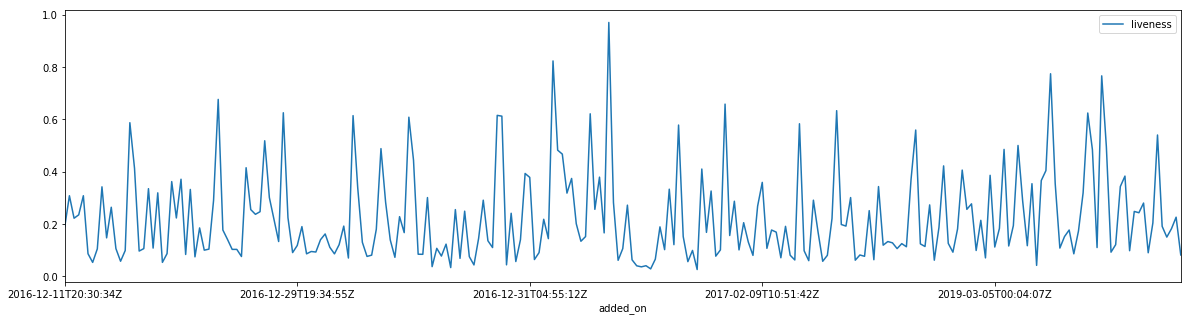

In [23]:
df.sort_values(by='added_on',ascending=True).plot(
    y='liveness',x='added_on',
    kind='line',
    figsize=(20,5)
)

# How many tracks are added during different parts of the day?
---

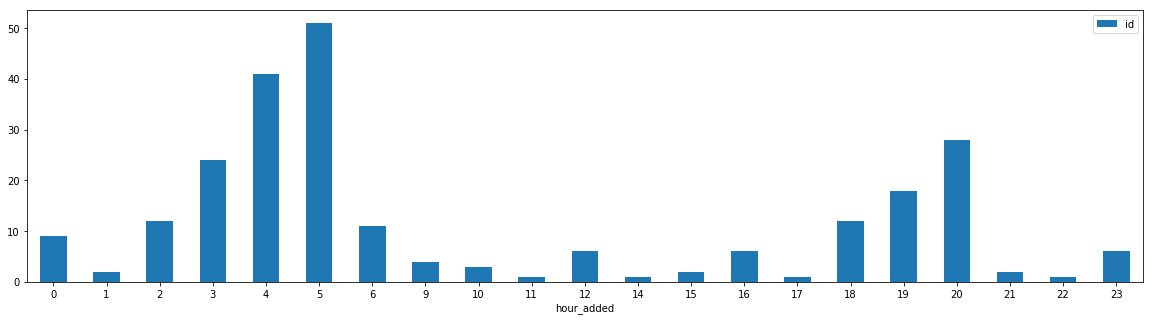

In [24]:
df.groupby('hour_added').count().reset_index().plot(y='id',x='hour_added',figsize=(20,5),kind='bar',rot=0)

# All features over time:
---

In [19]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [ ]:
for feature in features:
    df.plot(y=feature,x='date_added',rot=90,figsize=(15,5),kind='line')

# By Hour Added  
---

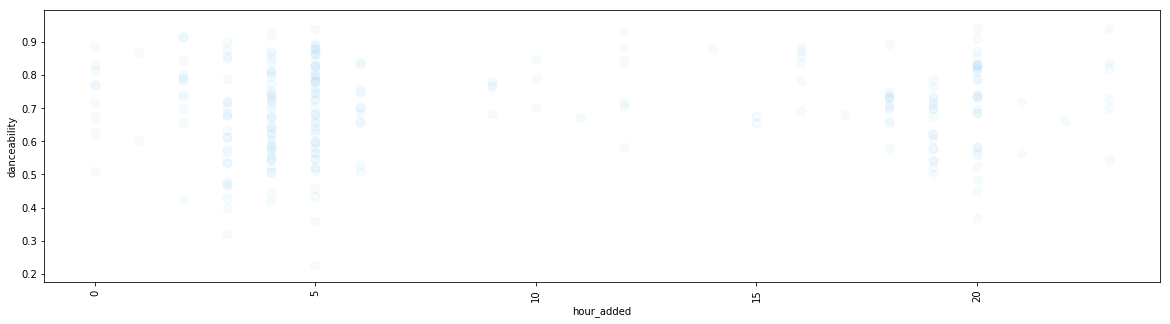

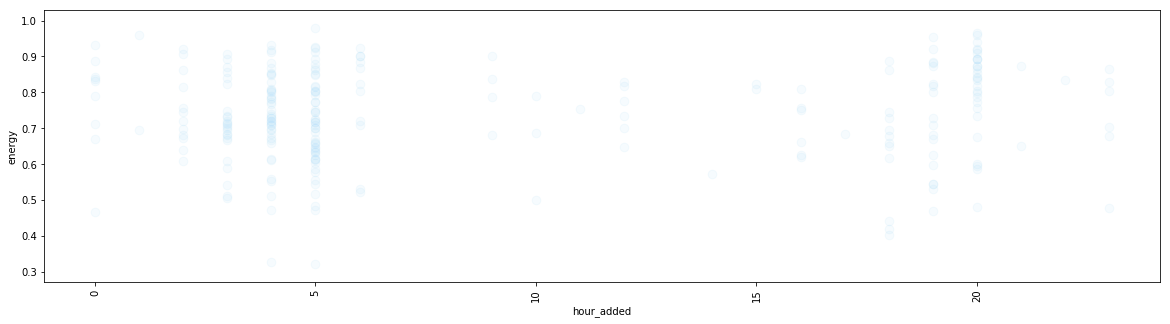

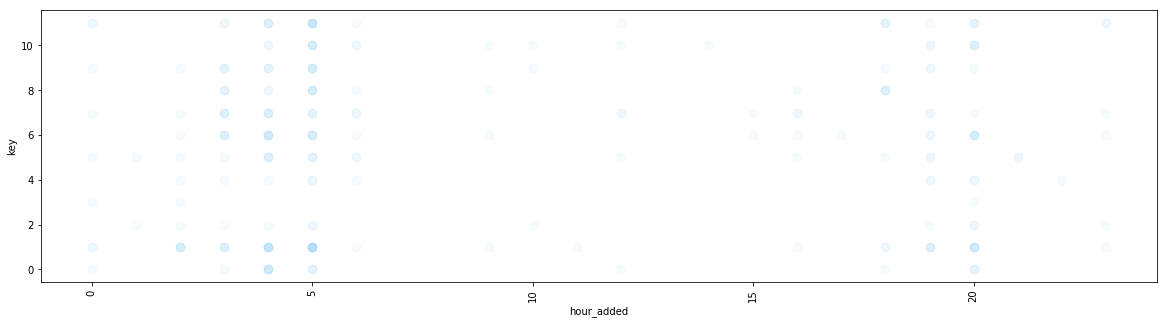

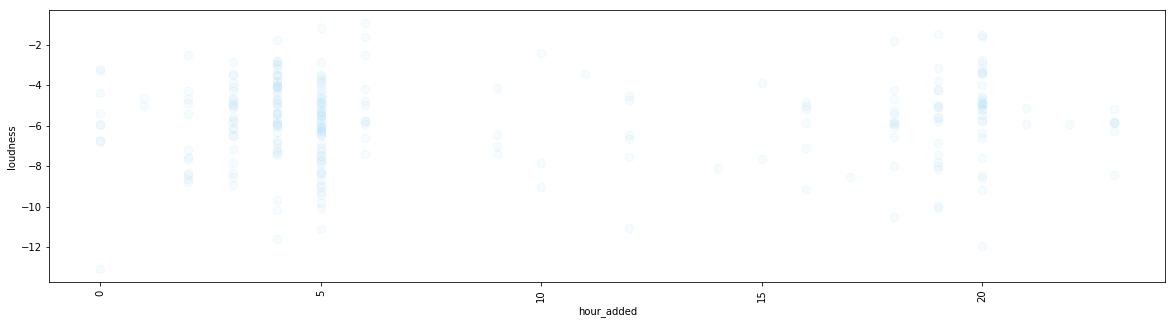

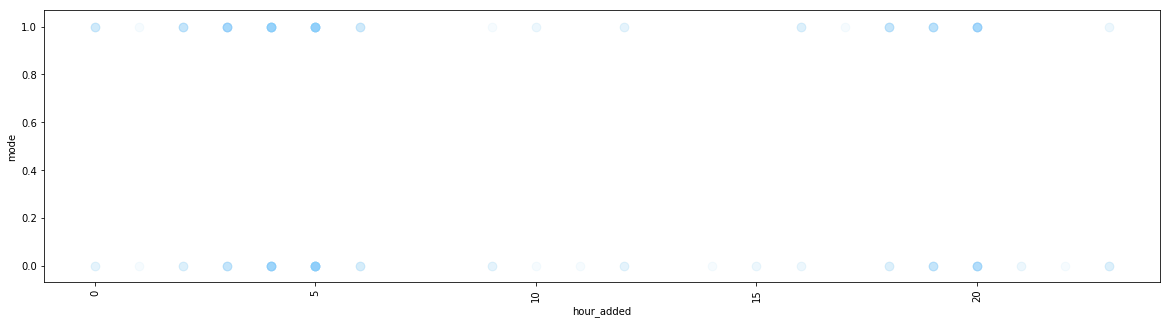

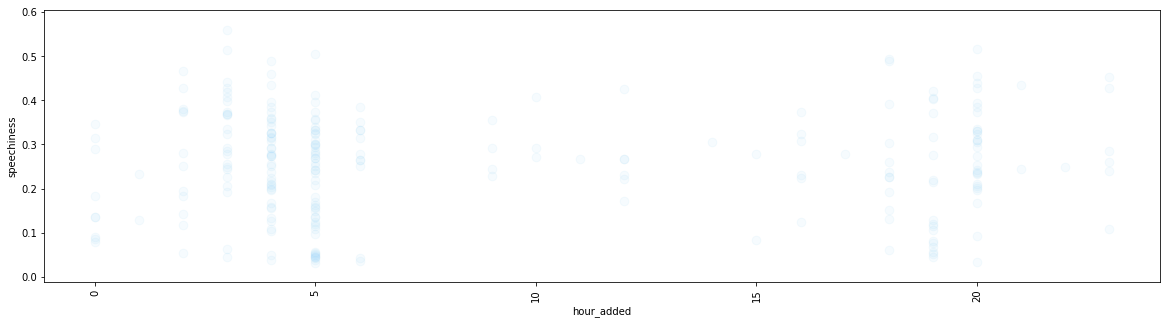

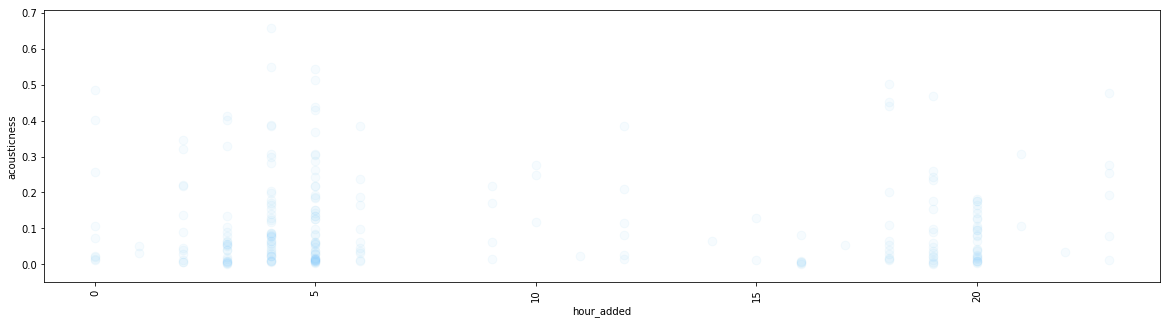

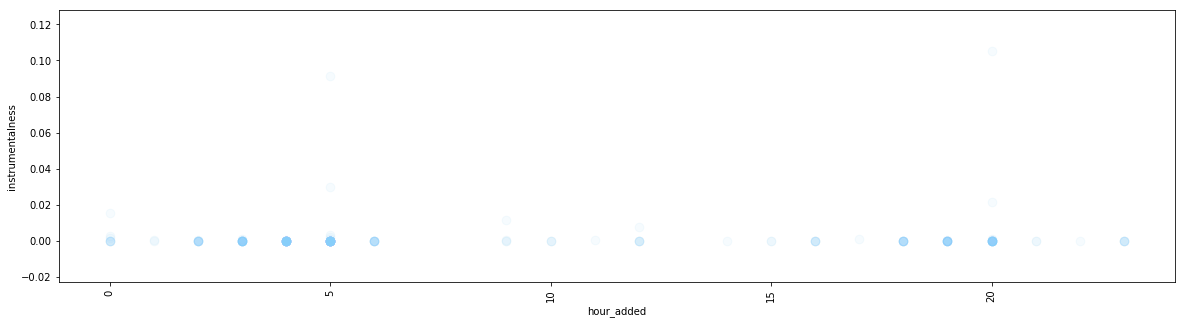

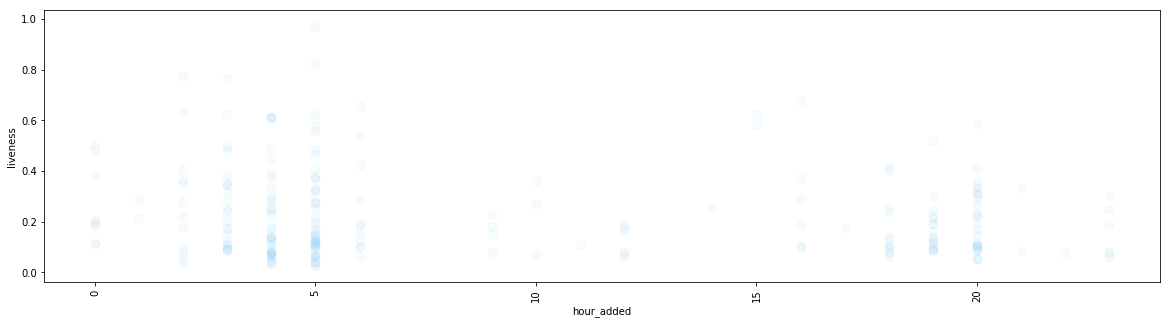

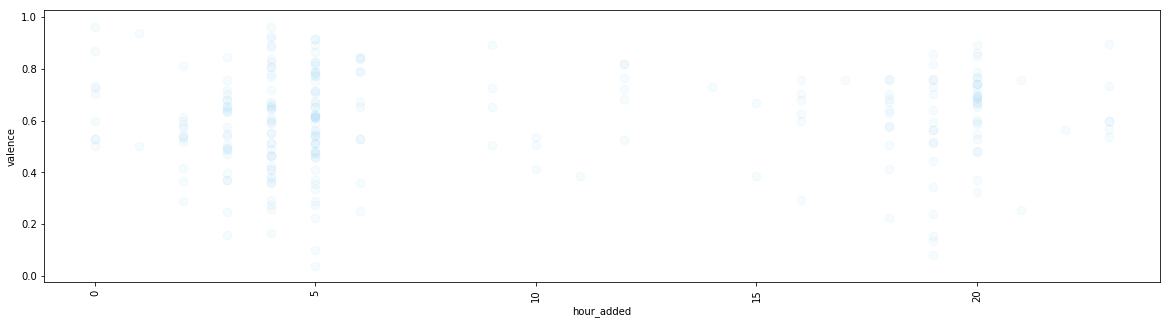

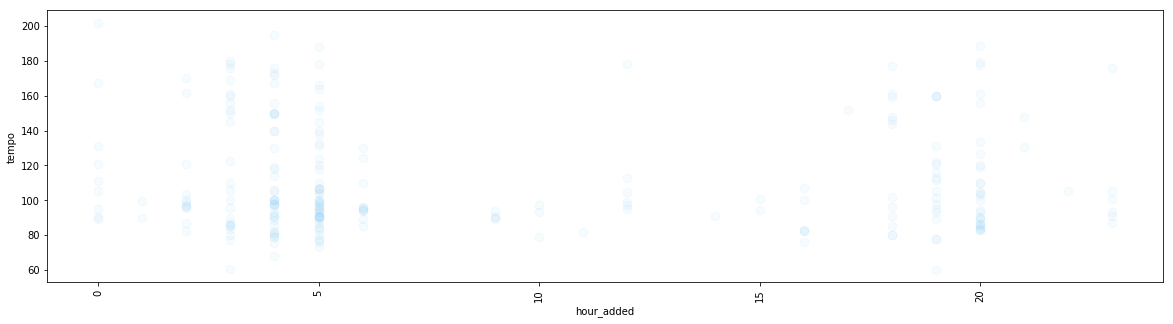

In [25]:
for feature in features:
    df.plot(y=feature,x='hour_added',rot=90,figsize=(20,5),kind='scatter',alpha=.075,c='lightskyblue',s=75)

Energy has an interesting trend:

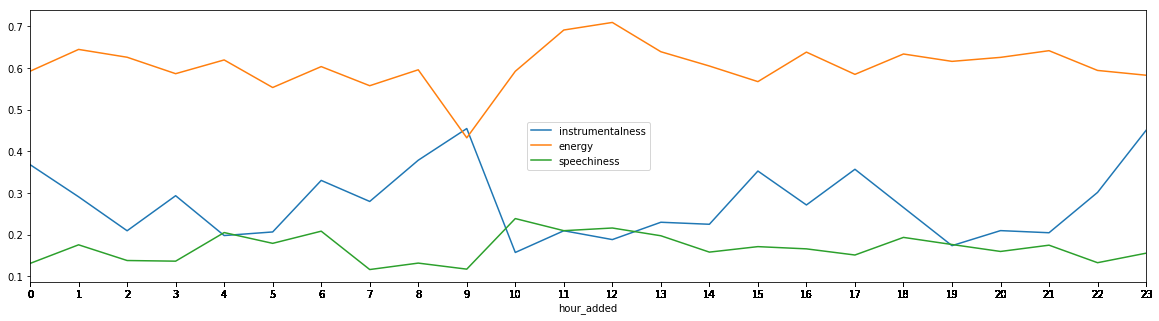

In [150]:
df.groupby('hour_added').mean().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['hour_added']
) # this is coffee.

# By Day Added

Less days in the week than hours in a day, so there is more overlap of values (so a smaller marker size is used)

---

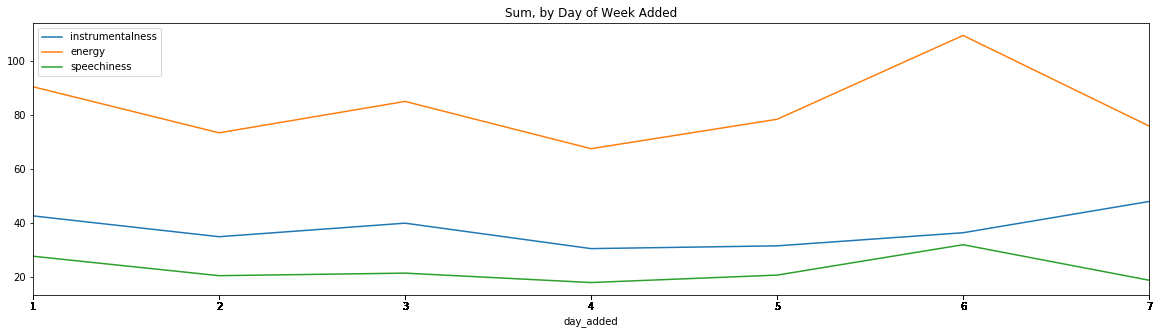

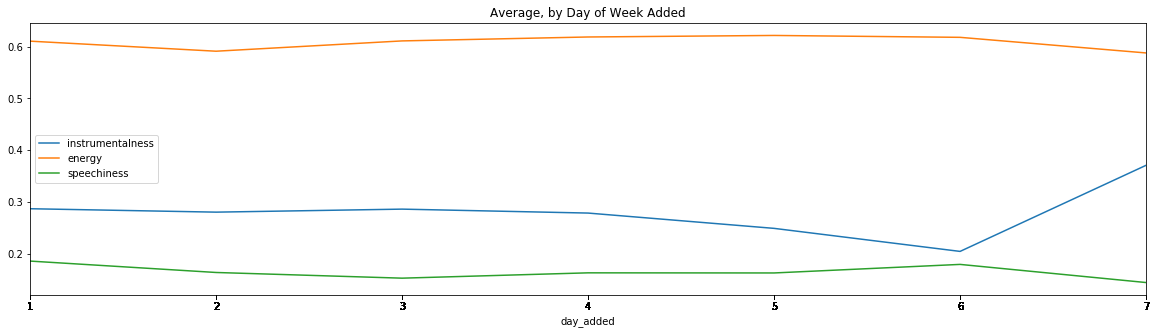

In [155]:
df.groupby('day_added').sum().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['day_added'],
    title='Sum, by Day of Week Added'
) # this is coffee.

df.groupby('day_added').mean().plot(
    y=['instrumentalness','energy','speechiness'], #luckily these all use the same y axis
    kind='line',
    figsize=(20,5),
    xticks=df['day_added'],
    title='Average, by Day of Week Added'
) # this is coffee.

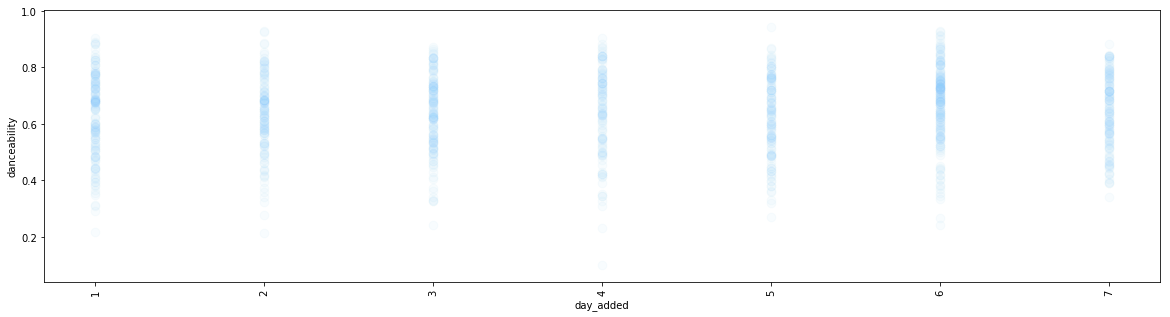

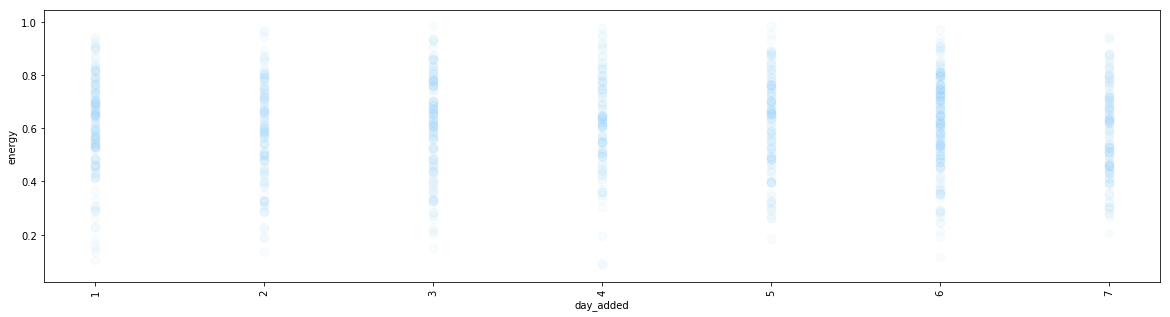

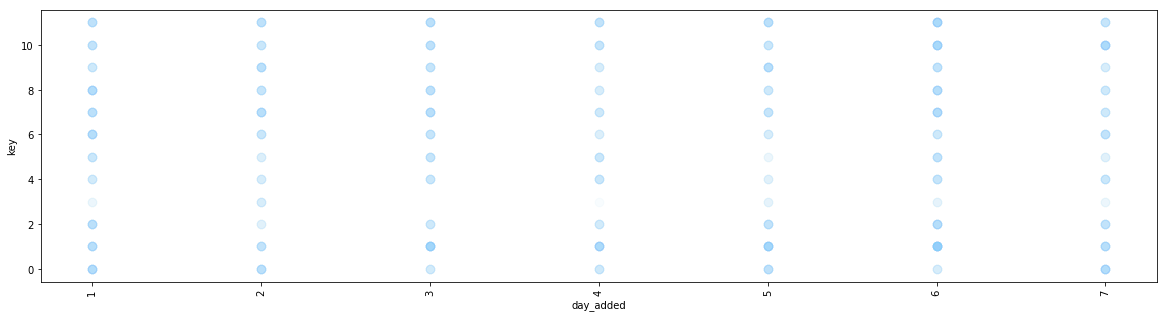

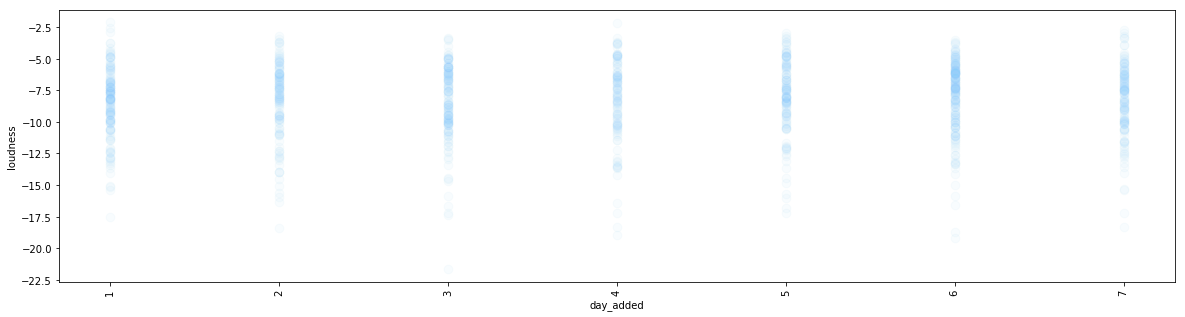

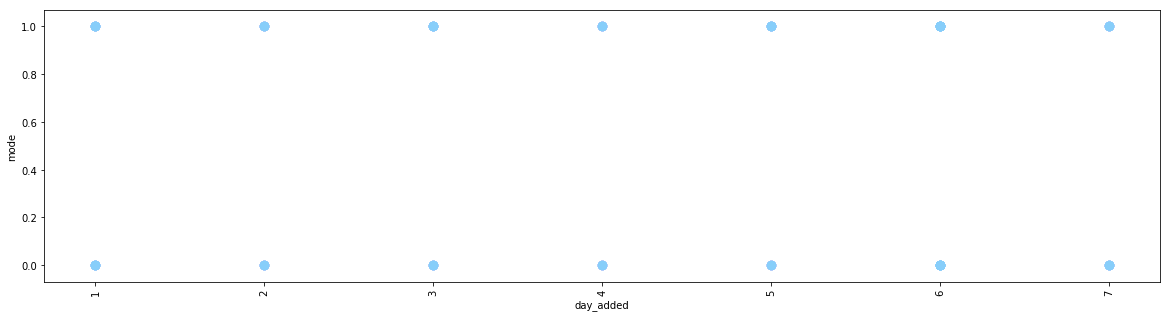

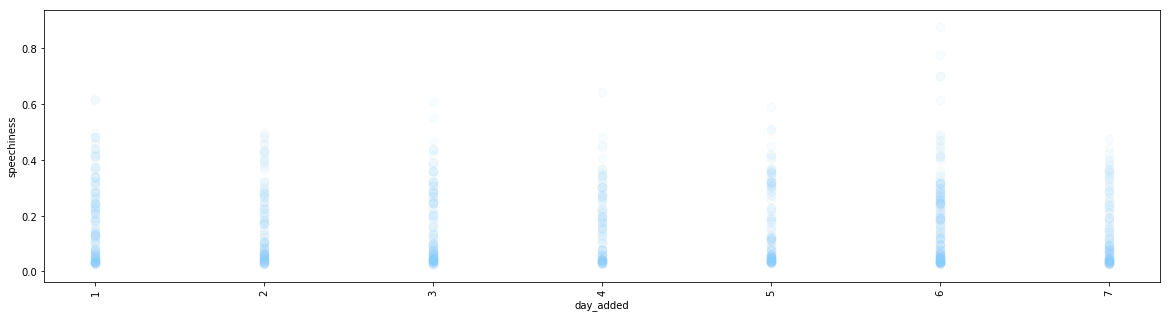

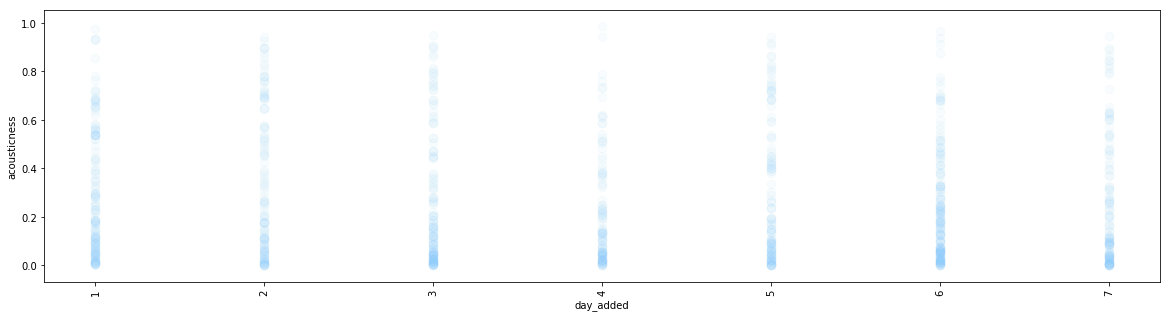

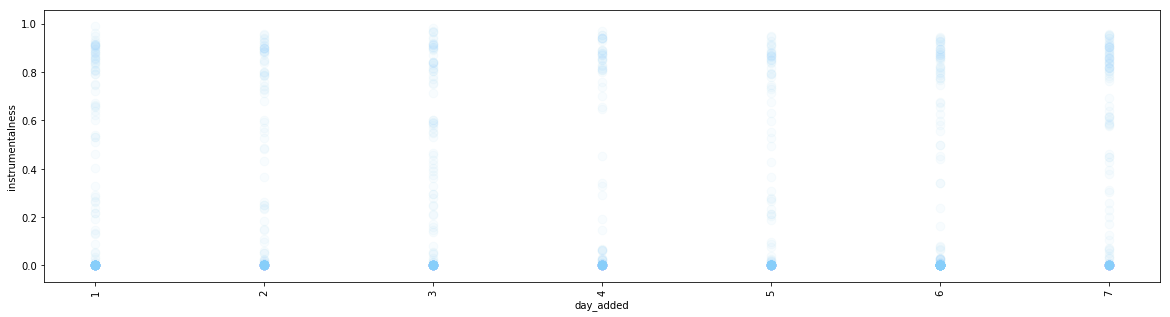

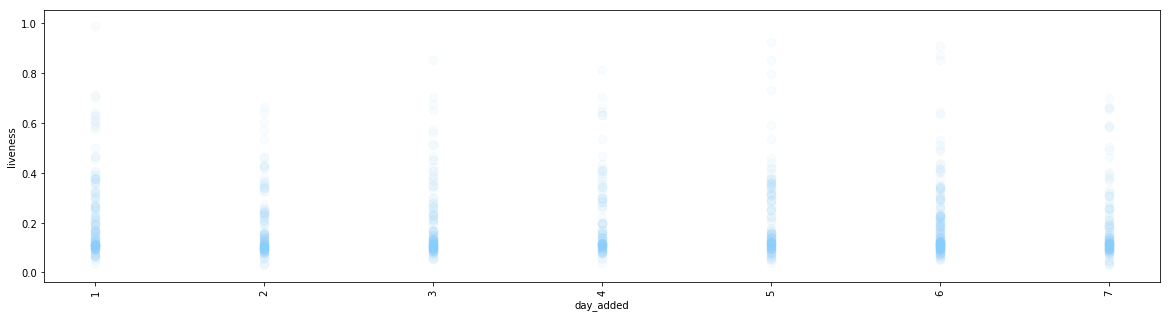

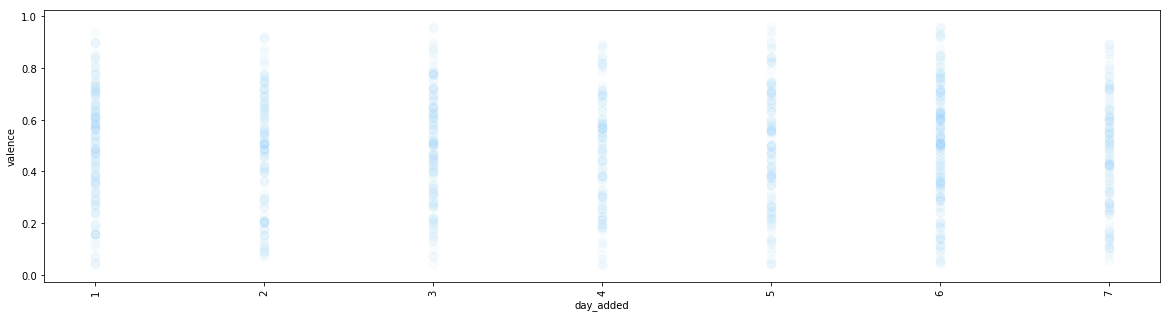

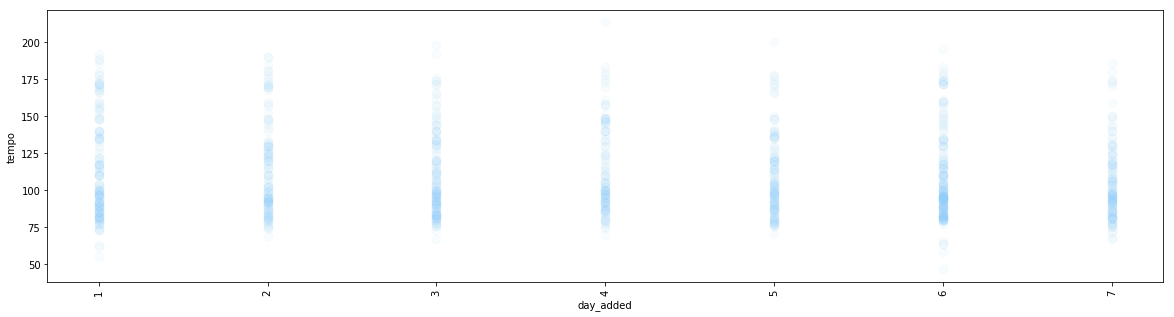

In [135]:
for feature in features:
    df.plot(y=feature,x='day_added',rot=90,figsize=(20,5),kind='scatter',alpha=.05,c='lightskyblue',s=75)

---

What are the songs added after 10AM?

In [37]:
df[(df['hour_added'] >= 11) & (df['hour_added'] <= 13)].head()

,playlist_id,playlist_name,playlist_uri,track_id,track_name,track_uri,added_on,danceability,energy,key,...,uri,track_href,analysis_url,duration_ms,time_signature,time_added,date_added,hour_added,day_added,month_added
129,3y49fFPdrFmUasnATCd6uH,Hip-Hop: 2000 - 2006,spotify:playlist:3y49fFPdrFmUasnATCd6uH,6CN3e26iQSj1N5lomh0mfO,Like Toy Soldiers,spotify:track:6CN3e26iQSj1N5lomh0mfO,2017-02-09T11:01:31Z,0.671,0.755,1.0,...,spotify:track:6CN3e26iQSj1N5lomh0mfO,https://api.spotify.com/v1/tracks/6CN3e26iQSj1...,https://api.spotify.com/v1/audio-analysis/6CN3...,296880.0,4.0,11:01:31,2017-02-09,11,4,2
130,3y49fFPdrFmUasnATCd6uH,Hip-Hop: 2000 - 2006,spotify:playlist:3y49fFPdrFmUasnATCd6uH,4JNTpbntShpUpACDUzwHV5,GO!,spotify:track:4JNTpbntShpUpACDUzwHV5,2017-02-09T12:03:08Z,0.842,0.775,10.0,...,spotify:track:4JNTpbntShpUpACDUzwHV5,https://api.spotify.com/v1/tracks/4JNTpbntShpU...,https://api.spotify.com/v1/audio-analysis/4JNT...,224160.0,4.0,12:03:08,2017-02-09,12,4,2
131,3y49fFPdrFmUasnATCd6uH,Hip-Hop: 2000 - 2006,spotify:playlist:3y49fFPdrFmUasnATCd6uH,6ug1aF09BMclmvs4XCPG5D,So High - Cloud 9 Remix,spotify:track:6ug1aF09BMclmvs4XCPG5D,2017-02-09T12:04:46Z,0.582,0.818,5.0,...,spotify:track:6ug1aF09BMclmvs4XCPG5D,https://api.spotify.com/v1/tracks/6ug1aF09BMcl...,https://api.spotify.com/v1/audio-analysis/6ug1...,307280.0,4.0,12:04:46,2017-02-09,12,4,2
132,3y49fFPdrFmUasnATCd6uH,Hip-Hop: 2000 - 2006,spotify:playlist:3y49fFPdrFmUasnATCd6uH,5GO4rpfnM2lghVqEulTJUf,They Say,spotify:track:5GO4rpfnM2lghVqEulTJUf,2017-02-09T12:08:14Z,0.715,0.701,11.0,...,spotify:track:5GO4rpfnM2lghVqEulTJUf,https://api.spotify.com/v1/tracks/5GO4rpfnM2lg...,https://api.spotify.com/v1/audio-analysis/5GO4...,237040.0,4.0,12:08:14,2017-02-09,12,4,2
133,3y49fFPdrFmUasnATCd6uH,Hip-Hop: 2000 - 2006,spotify:playlist:3y49fFPdrFmUasnATCd6uH,1eFuyVf8I77imXbGAtJfvF,Certified feat. Bilal,spotify:track:1eFuyVf8I77imXbGAtJfvF,2017-02-09T12:16:32Z,0.705,0.734,0.0,...,spotify:track:1eFuyVf8I77imXbGAtJfvF,https://api.spotify.com/v1/tracks/1eFuyVf8I77i...,https://api.spotify.com/v1/audio-analysis/1eFu...,280893.0,5.0,12:16:32,2017-02-09,12,4,2


# Takeaways

---
- Does Spotify use time-based features in their recommendation systems?